In [60]:
from keras.models import load_model
import cv2
import numpy as np
from metrics import Metrics, top_3_acc
from os import listdir
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline



In [34]:
images = [f for f in listdir(".") if f.endswith(".jpg")]
print(images)

['59a9601140307c4c64e96468.jpg', 'test.jpg']


In [24]:
model = load_model('models/model.hdf5',custom_objects={'top_3_acc': top_3_acc})

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',top_3_acc])

In [63]:
## Ovo treba povuci kod treniranja => train_generator.class_indices
## i spremiti u model da ja mogu povuci kao custom varijablu iz modela

labels = {'Albertsons': 0, 'BJs': 1, 'CVSPharmacy': 2, 'Costco': 3, 'FredMeyer': 4, 'Frys': 5, 'HEB': 6, 'HarrisTeeter': 7, 'HyVee': 8, 'JewelOsco': 9, 'KingSoopers': 10, 'Kroger': 11, 'Meijer': 12, 'Publix': 13, 'Safeway': 14, 'SamsClub': 15, 'ShopRite': 16, 'Smiths': 17, 'StopShop': 18, 'Target': 19, 'Walgreens': 20, 'Walmart': 21, 'Wegmans': 22, 'WholeFoodsMarket': 23, 'WinCoFoods': 24}
labels = dict((v,k) for k,v in labels.iteritems())


AttributeError: 'dict' object has no attribute 'iteritems'

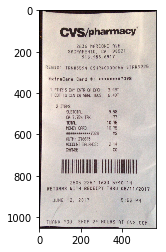

KeyError: 11

In [61]:
plt.figure()
##Moze se i prvo napraviti predict u batchu
##pa samo prolaziti kroz rezultate dole..
for i,image_name in enumerate(images):
    image = Image.open(image_name)
    plt.imshow(image)
    img = cv2.imread(image_name)
    img = cv2.resize(img,(299,150))
    img = np.reshape(img,[1,299,150,3])
    plt.show()
    classes = model.predict(img)
    predicted_class = np.argmax(classes)
    print("Class:",labels[predicted_class]," Conf:",classes[0][predicted_class])

